In [1]:
# Define a function to perform data preprocessing
def preprocess_data(df):
    # Calculate the count of each carrier and sort in descending order
    carrier_counts = df['OP_UNIQUE_CARRIER'].value_counts().to_dict()
    df['carrier_count'] = df['OP_UNIQUE_CARRIER'].map(carrier_counts)
    df = df.sort_values(by='carrier_count', ascending=False)
    
    # Select the top ten carriers by count
    top_carriers = df['OP_UNIQUE_CARRIER'].value_counts().nlargest(10).index
    df = df[df['OP_UNIQUE_CARRIER'].isin(top_carriers)]
    return df

In [2]:
# Create an empty DataFrame for merging
import pandas as pd 
import warnings

warnings.filterwarnings('ignore')

combined_data = pd.DataFrame()


df = pd.read_csv('data_final_0817.csv')
df = preprocess_data(df)
combined_data = pd.concat([combined_data, df], ignore_index=True)

In [3]:
print("Number of rows in the dataset:", combined_data.shape)

Number of rows in the dataset: (40557, 43)


In [4]:
# A total of what number of domestic flights tracked in the United States from January 2022 to April 2023 can be captured according to our defined starting and ending ranges. 
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40557 entries, 0 to 40556
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TAIL_NUM                       40557 non-null  int64  
 1   DEST                           40557 non-null  int64  
 2   FL_DATE                        40557 non-null  object 
 3   ARR_TIME                       40557 non-null  int64  
 4   ORIGIN                         40557 non-null  int64  
 5   DEP_TIME                       40557 non-null  int64  
 6   YEAR                           40557 non-null  int64  
 7   QUARTER                        40557 non-null  int64  
 8   MONTH                          40557 non-null  int64  
 9   DAY_OF_MONTH                   40557 non-null  int64  
 10  DAY_OF_WEEK                    40557 non-null  int64  
 11  OP_UNIQUE_CARRIER              40557 non-null  int64  
 12  DEP_DELAY                      40557 non-null 

In [5]:
combined_data.groupby('OP_UNIQUE_CARRIER').count()

,TAIL_NUM,DEST,FL_DATE,ARR_TIME,ORIGIN,DEP_TIME,YEAR,QUARTER,MONTH,DAY_OF_MONTH,...,HourlyWetBulbTemperature.arr,HourlyWindDirection.arr,AA,AS,B6,DL,UA,ARR_DELAY_ENCODED,DEP_DELAY_ENCODED,carrier_count
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
1,12718,12718,12718,12718,12718,12718,12718,12718,12718,12718,...,11803,12718,12718,12718,12718,12718,12718,12718,12718,12718
2,329,329,329,329,329,329,329,329,329,329,...,327,329,329,329,329,329,329,329,329,329
3,13167,13167,13167,13167,13167,13167,13167,13167,13167,13167,...,12115,13167,13167,13167,13167,13167,13167,13167,13167,13167
4,12254,12254,12254,12254,12254,12254,12254,12254,12254,12254,...,11087,12254,12254,12254,12254,12254,12254,12254,12254,12254
5,2089,2089,2089,2089,2089,2089,2089,2089,2089,2089,...,1956,2089,2089,2089,2089,2089,2089,2089,2089,2089


In [6]:
# 计算每列的缺失值数量
missing_values = combined_data.isnull().sum()
print(missing_values)

TAIL_NUM                             0
DEST                                 0
FL_DATE                              0
ARR_TIME                             0
ORIGIN                               0
DEP_TIME                             0
YEAR                                 0
QUARTER                              0
MONTH                                0
DAY_OF_MONTH                         0
DAY_OF_WEEK                          0
OP_UNIQUE_CARRIER                    0
DEP_DELAY                            0
ARR_DELAY                            0
DEP_HOUR                             0
ARR_HOUR                             0
dep_weather_time                     0
arr_weather_time                     0
HourlyDewPointTemperature            0
HourlyDryBulbTemperature             0
HourlyPressureChange             19248
HourlyRelativeHumidity               0
HourlyPrecipitation                  0
HourlyStationPressure                0
HourlyVisibility                     0
HourlyWetBulbTemperature 

In [6]:
import matplotlib.pyplot as plt

# 提取前十名航空公司的航班数据
top_airlines = combined_data['OP_UNIQUE_CARRIER'].value_counts().head(10).index
data_subset = combined_data[combined_data['OP_UNIQUE_CARRIER'].isin(top_airlines)]

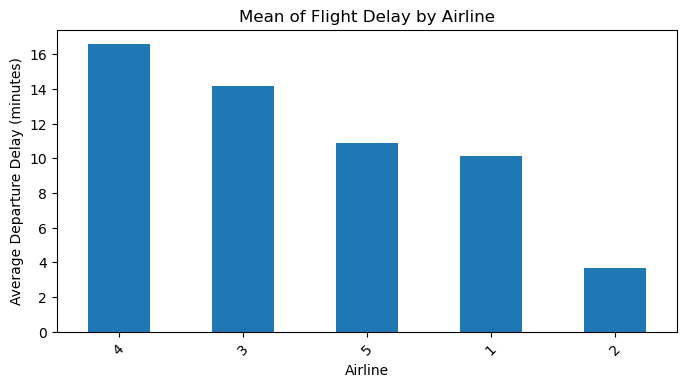

In [7]:
import seaborn as sns
# Calculate the mean number of flight delays for each airline
airline_delay_mean = data_subset.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].mean()

# Sort the total number of airline flight delays
airline_delay_mean_sorted = airline_delay_mean.sort_values(ascending=False)

plt.figure(figsize=(8,4), dpi=100)
airline_delay_mean_sorted.plot(kind='bar')
plt.title("Mean of Flight Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.savefig('Mean of Flight Delay by Airline.jpg')
plt.show()

In [8]:
airline_delay_mean_sorted

OP_UNIQUE_CARRIER
4    16.589848
3    14.171869
5    10.847295
1    10.097893
2     3.693009
Name: DEP_DELAY, dtype: float64

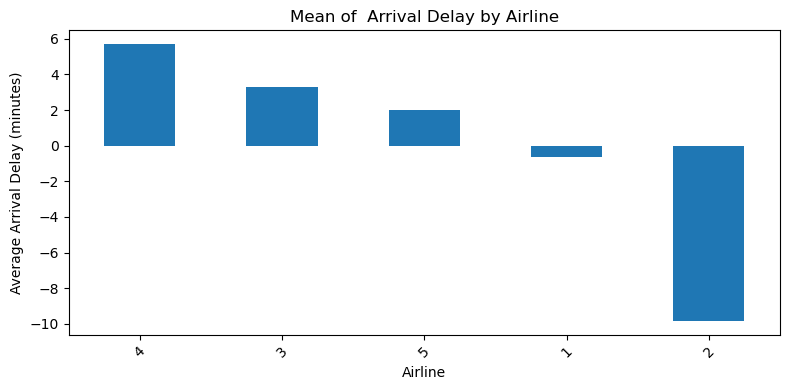

In [9]:
# Calculate the mean arrival delay for each airline
airline_arrival_delay_mean = data_subset.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].mean()

# Sort the average arrival delay for each airline
airline_arrival_delay_mean_sorted = airline_arrival_delay_mean.sort_values(ascending=False)

plt.figure(figsize=(8, 4), dpi=100)
airline_arrival_delay_mean_sorted.plot(kind='bar')
plt.title("Mean of  Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Mean of  Arrival Delay by Airline.jpg')
plt.show()

In [10]:
airline_arrival_delay_mean_sorted

OP_UNIQUE_CARRIER
4    5.695773
3    3.297106
5    2.019148
1   -0.658437
2   -9.823708
Name: ARR_DELAY, dtype: float64

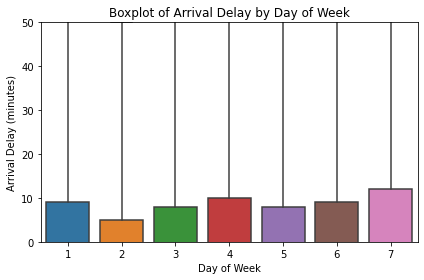

In [11]:
sns.boxplot(x=combined_data['DAY_OF_WEEK'], y=combined_data['ARR_DELAY'])
plt.title("Boxplot of Arrival Delay by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Arrival Delay (minutes)")
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('Boxplot of Arrival Delay by Day of Week.jpg')
plt.show()

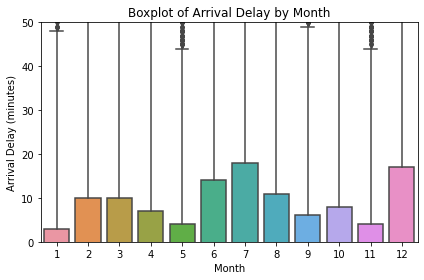

In [12]:
sns.boxplot(x=combined_data['MONTH'], y=combined_data['ARR_DELAY'])
plt.title("Boxplot of Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (minutes)")
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('Boxplot of Arrival Delay by Month.jpg')
plt.show()

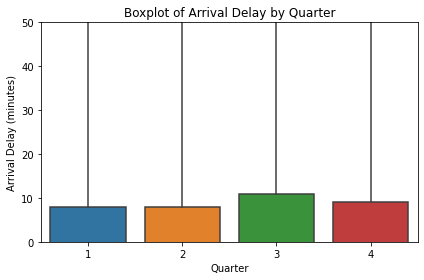

In [13]:
sns.boxplot(x=combined_data['QUARTER'], y=combined_data['ARR_DELAY'])
plt.title("Boxplot of Arrival Delay by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Arrival Delay (minutes)")
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('Boxplot of Arrival Delay by Quarter.jpg')
plt.show()

In [14]:
selected_columns = ['HourlyWindDirection', 'HourlyVisibility', 'HourlyStationPressure', 'HourlyPrecipitation.arr', 'HourlyRelativeHumidity.arr',
                    'HourlyDryBulbTemperature.arr', 'HourlyDewPointTemperature.arr','HourlyPrecipitation','HourlyRelativeHumidity','HourlyWindDirection.arr',
                    'HourlyDryBulbTemperature','HourlyDewPointTemperature','DAY_OF_WEEK','OP_UNIQUE_CARRIER','HourlyVisibility.arr',
                   'HourlyStationPressure.arr','DAY_OF_MONTH','MONTH','QUARTER','YEAR','DEP_DELAY_ENCODED','ARR_DELAY_ENCODED']

combined_data = combined_data[selected_columns]
# Remove rows with missing values
combined_data = combined_data.dropna()
combined_data.head(10)

,HourlyWindDirection,HourlyVisibility,HourlyStationPressure,HourlyPrecipitation.arr,HourlyRelativeHumidity.arr,HourlyDryBulbTemperature.arr,HourlyDewPointTemperature.arr,HourlyPrecipitation,HourlyRelativeHumidity,HourlyWindDirection.arr,...,DAY_OF_WEEK,OP_UNIQUE_CARRIER,HourlyVisibility.arr,HourlyStationPressure.arr,DAY_OF_MONTH,MONTH,QUARTER,YEAR,DEP_DELAY_ENCODED,ARR_DELAY_ENCODED
0,12,22,102,2,88,56,88,2,79,2,...,4,3,42,50,29,7,3,2021,1,1
1,39,22,95,2,57,71,91,2,48,18,...,3,3,22,47,14,9,3,2022,0,0
2,30,22,126,2,82,51,79,2,14,2,...,1,3,22,53,7,11,4,2022,1,1
3,9,22,142,2,36,56,58,2,51,22,...,4,3,22,63,3,11,4,2022,0,0
4,14,22,131,2,50,60,72,2,49,22,...,3,3,22,57,2,11,4,2022,0,0
5,12,43,100,2,85,58,89,1,67,23,...,1,3,22,43,31,10,4,2022,0,0
6,2,28,83,2,63,60,82,1,85,21,...,3,3,22,49,26,10,4,2022,0,0
7,6,5,103,1,76,56,83,1,92,1,...,2,3,43,1,25,10,4,2022,1,1
8,25,22,95,1,74,60,87,38,90,16,...,6,3,22,1,1,10,4,2022,0,0
9,12,22,85,2,68,62,87,2,74,19,...,3,3,22,51,21,9,3,2022,0,0


In [15]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40557 entries, 0 to 40556
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   HourlyWindDirection            40557 non-null  int64
 1   HourlyVisibility               40557 non-null  int64
 2   HourlyStationPressure          40557 non-null  int64
 3   HourlyPrecipitation.arr        40557 non-null  int64
 4   HourlyRelativeHumidity.arr     40557 non-null  int64
 5   HourlyDryBulbTemperature.arr   40557 non-null  int64
 6   HourlyDewPointTemperature.arr  40557 non-null  int64
 7   HourlyPrecipitation            40557 non-null  int64
 8   HourlyRelativeHumidity         40557 non-null  int64
 9   HourlyWindDirection.arr        40557 non-null  int64
 10  HourlyDryBulbTemperature       40557 non-null  int64
 11  HourlyDewPointTemperature      40557 non-null  int64
 12  DAY_OF_WEEK                    40557 non-null  int64
 13  OP_UNIQUE_CARRIE

In [16]:
combined_data.to_csv("combined_data.csv")  # 运行一次就行

第二阶段入口，如果从头开始就不需要运行下面这个代码框中的代码

In [28]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

combined_data = pd.read_csv('combined_data.csv')
combined_data.head()

,:,,,,.,.,.,.,.,.,...,,,,,,,,,,
0,0,12,22,102,2,88,56,88,12,22,...,29,3,2021,1,0,0,0,0,1,1
1,1,39,22,95,2,57,71,91,39,22,...,14,3,2022,1,0,0,0,0,0,0
2,2,30,22,126,2,82,51,79,30,22,...,7,4,2022,1,0,0,0,0,1,1
3,3,9,22,142,2,36,56,58,9,22,...,3,4,2022,1,0,0,0,0,0,0
4,4,14,22,131,2,50,60,72,14,22,...,2,4,2022,1,0,0,0,0,0,0


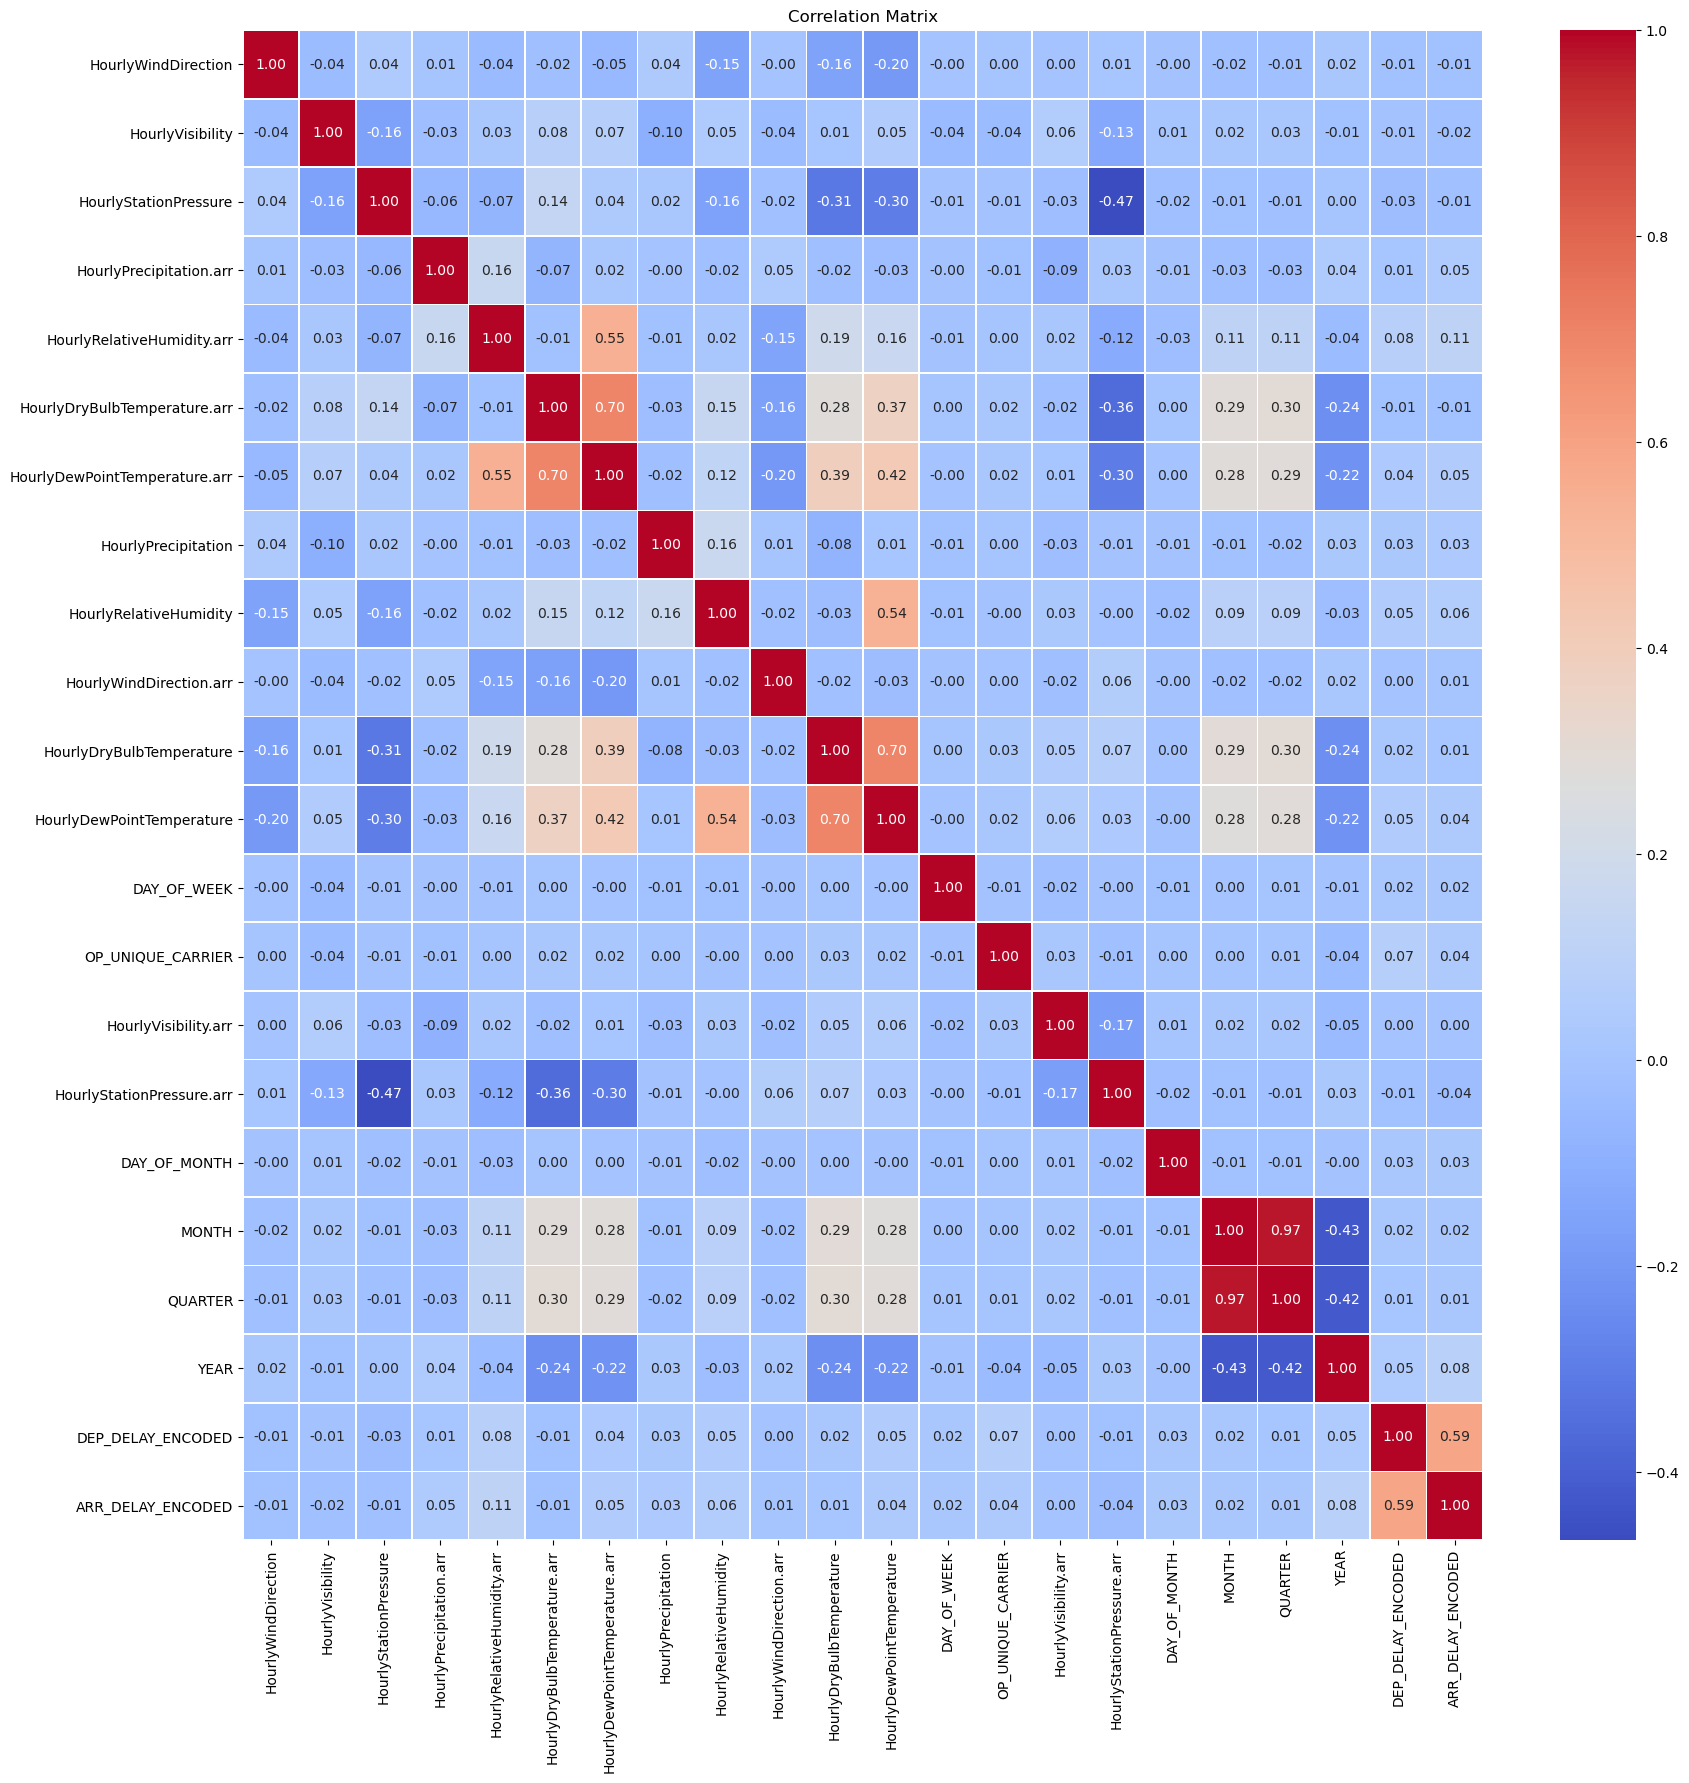

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation coefficient matrix
correlation_matrix = combined_data.corr()

plt.figure(figsize=(20, 20),dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.jpg')
plt.show()

In [18]:
import numpy as np
np.round(correlation_matrix,2)

,HourlyWindDirection,HourlyVisibility,HourlyStationPressure,HourlyPrecipitation.arr,HourlyRelativeHumidity.arr,HourlyDryBulbTemperature.arr,HourlyDewPointTemperature.arr,HourlyPrecipitation,HourlyRelativeHumidity,HourlyWindDirection.arr,...,DAY_OF_WEEK,OP_UNIQUE_CARRIER,HourlyVisibility.arr,HourlyStationPressure.arr,DAY_OF_MONTH,MONTH,QUARTER,YEAR,DEP_DELAY_ENCODED,ARR_DELAY_ENCODED
HourlyWindDirection,1.00,-0.04,0.04,0.01,-0.04,-0.02,-0.05,0.04,-0.15,-0.00,...,-0.00,0.00,0.00,0.01,-0.00,-0.02,-0.01,0.02,-0.01,-0.01
HourlyVisibility,-0.04,1.00,-0.16,-0.03,0.03,0.08,0.07,-0.10,0.05,-0.04,...,-0.04,-0.04,0.06,-0.13,0.01,0.02,0.03,-0.01,-0.01,-0.02
HourlyStationPressure,0.04,-0.16,1.00,-0.06,-0.07,0.14,0.04,0.02,-0.16,-0.02,...,-0.01,-0.01,-0.03,-0.47,-0.02,-0.01,-0.01,0.00,-0.03,-0.01
HourlyPrecipitation.arr,0.01,-0.03,-0.06,1.00,0.16,-0.07,0.02,-0.00,-0.02,0.05,...,-0.00,-0.01,-0.09,0.03,-0.01,-0.03,-0.03,0.04,0.01,0.05
HourlyRelativeHumidity.arr,-0.04,0.03,-0.07,0.16,1.00,-0.01,0.55,-0.01,0.02,-0.15,...,-0.01,0.00,0.02,-0.12,-0.03,0.11,0.11,-0.04,0.08,0.11
HourlyDryBulbTemperature.arr,-0.02,0.08,0.14,-0.07,-0.01,1.00,0.70,-0.03,0.15,-0.16,...,0.00,0.02,-0.02,-0.36,0.00,0.29,0.30,-0.24,-0.01,-0.01
HourlyDewPointTemperature.arr,-0.05,0.07,0.04,0.02,0.55,0.70,1.00,-0.02,0.12,-0.20,...,-0.00,0.02,0.01,-0.30,0.00,0.28,0.29,-0.22,0.04,0.05
HourlyPrecipitation,0.04,-0.10,0.02,-0.00,-0.01,-0.03,-0.02,1.00,0.16,0.01,...,-0.01,0.00,-0.03,-0.01,-0.01,-0.01,-0.02,0.03,0.03,0.03
HourlyRelativeHumidity,-0.15,0.05,-0.16,-0.02,0.02,0.15,0.12,0.16,1.00,-0.02,...,-0.01,-0.00,0.03,-0.00,-0.02,0.09,0.09,-0.03,0.05,0.06
HourlyWindDirection.arr,-0.00,-0.04,-0.02,0.05,-0.15,-0.16,-0.20,0.01,-0.02,1.00,...,-0.00,0.00,-0.02,0.06,-0.00,-0.02,-0.02,0.02,0.00,0.01


The correlation between DEP_DELAY (Departure Delay) and other variables is as follows:

1. The strongest positive correlation exists with CARRIER_DELAY (Carrier Delay) and LATE_AIRCRAFT_DELAY (Late Aircraft Delay), with correlation coefficients of 0.72 and 0.52, respectively. This indicates that flights with longer departure delays are likely to be associated with delays caused by the airline or late arrival of aircraft.

2. There is also a weaker positive correlation with WEATHER_DELAY (Weather Delay) and NAS_DELAY (National Aviation System Delay), with correlation coefficients of 0.26 and 0.07, respectively. This suggests that flights with longer departure delays may also be influenced by weather-related delays or delays in the national aviation system, although the correlation strength is relatively low.


The correlation between ARR_DELAY (Arrival Delay) and other variables is as follows:


The correlation coefficient between ARR_DELAY (Arrival Delay) and DEP_DELAY (Departure Delay) is 0.10, indicating a certain positive correlation between departure delay and arrival delay. However, the correlation is not very strong.





 


In [19]:
descriptive_stats = combined_data.describe()
pd.options.display.float_format = '{:,.2f}'.format

descriptive_stats.to_csv('data_describe.csv', encoding='utf-8-sig')
descriptive_stats

,HourlyWindDirection,HourlyVisibility,HourlyStationPressure,HourlyPrecipitation.arr,HourlyRelativeHumidity.arr,HourlyDryBulbTemperature.arr,HourlyDewPointTemperature.arr,HourlyPrecipitation,HourlyRelativeHumidity,HourlyWindDirection.arr,...,DAY_OF_WEEK,OP_UNIQUE_CARRIER,HourlyVisibility.arr,HourlyStationPressure.arr,DAY_OF_MONTH,MONTH,QUARTER,YEAR,DEP_DELAY_ENCODED,ARR_DELAY_ENCODED
count,"40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00",...,"40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00","40,557.00"
mean,19.51,28.74,79.58,3.06,62.09,52.51,70.54,2.84,60.22,19.44,...,3.97,2.77,27.75,71.11,15.71,6.28,2.44,"2,021.81",0.20,0.21
std,10.02,9.82,33.78,7.00,19.38,13.80,19.69,6.19,19.59,9.39,...,2.01,1.31,9.53,32.63,8.71,3.48,1.13,0.69,0.40,0.40
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"2,021.00",0.00,0.00
25%,12.00,22.00,60.00,1.00,50.00,45.00,58.00,1.00,47.00,13.00,...,2.00,1.00,22.00,52.00,8.00,3.00,1.00,"2,021.00",0.00,0.00
50%,20.00,22.00,79.00,2.00,65.00,54.00,74.00,2.00,63.00,20.00,...,4.00,3.00,22.00,70.00,16.00,6.00,2.00,"2,022.00",0.00,0.00
75%,26.00,40.00,103.00,2.00,77.00,62.00,87.00,2.00,76.00,25.00,...,6.00,4.00,40.00,95.00,23.00,9.00,3.00,"2,022.00",0.00,0.00
max,39.00,43.00,171.00,42.00,92.00,94.00,108.00,38.00,92.00,39.00,...,7.00,5.00,43.00,162.00,31.00,12.00,4.00,"2,023.00",1.00,1.00


In [20]:
from sklearn.preprocessing import StandardScaler

df_features = combined_data.drop(labels=['ARR_DELAY_ENCODED'],axis = 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to perform feature scaling
df_features_scaled = scaler.fit_transform(df_features)

# Convert the scaled data back to a DataFrame
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

In [21]:
df_features_scaled['ARR_DELAY_ENCODED'] = combined_data['ARR_DELAY_ENCODED']

In [22]:
sampled_df = df_features_scaled.sample(frac=0.1, replace=False)

In [23]:
sampled_df = sampled_df.dropna()

In [24]:
X = sampled_df.drop(labels=['ARR_DELAY_ENCODED'],axis = 1)
y = sampled_df['ARR_DELAY_ENCODED']

In [25]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid = GridSearchCV(rf_model, param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)
y_pred_rf = grid_result.predict(X_test)

# Get the feature importance of the best model
best_model = grid_result.best_estimator_
feature_importances = best_model.feature_importances_

# The importance of printing features
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

# Best model
print("Best Parameters:", grid_result.best_params_)

HourlyWindDirection: 0.034946968651154944
HourlyVisibility: 0.01616350190004191
HourlyStationPressure: 0.03785373965301602
HourlyPrecipitation.arr: 0.01538096128076165
HourlyRelativeHumidity.arr: 0.04360976694729633
HourlyDryBulbTemperature.arr: 0.03763859192927501
HourlyDewPointTemperature.arr: 0.0388941569193754
HourlyPrecipitation: 0.011553217388100402
HourlyRelativeHumidity: 0.03995390751351648
HourlyWindDirection.arr: 0.032001390028347995
HourlyDryBulbTemperature: 0.03797786620046309
HourlyDewPointTemperature: 0.03713925996328582
DAY_OF_WEEK: 0.019700400132973014
OP_UNIQUE_CARRIER: 0.012377088697186324
HourlyVisibility.arr: 0.014434394397264133
HourlyStationPressure.arr: 0.03587298510376848
DAY_OF_MONTH: 0.03473525080762901
MONTH: 0.027688093031363943
QUARTER: 0.007788938541942048
YEAR: 0.014279543682567428
DEP_DELAY_ENCODED: 0.45000997723067054
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


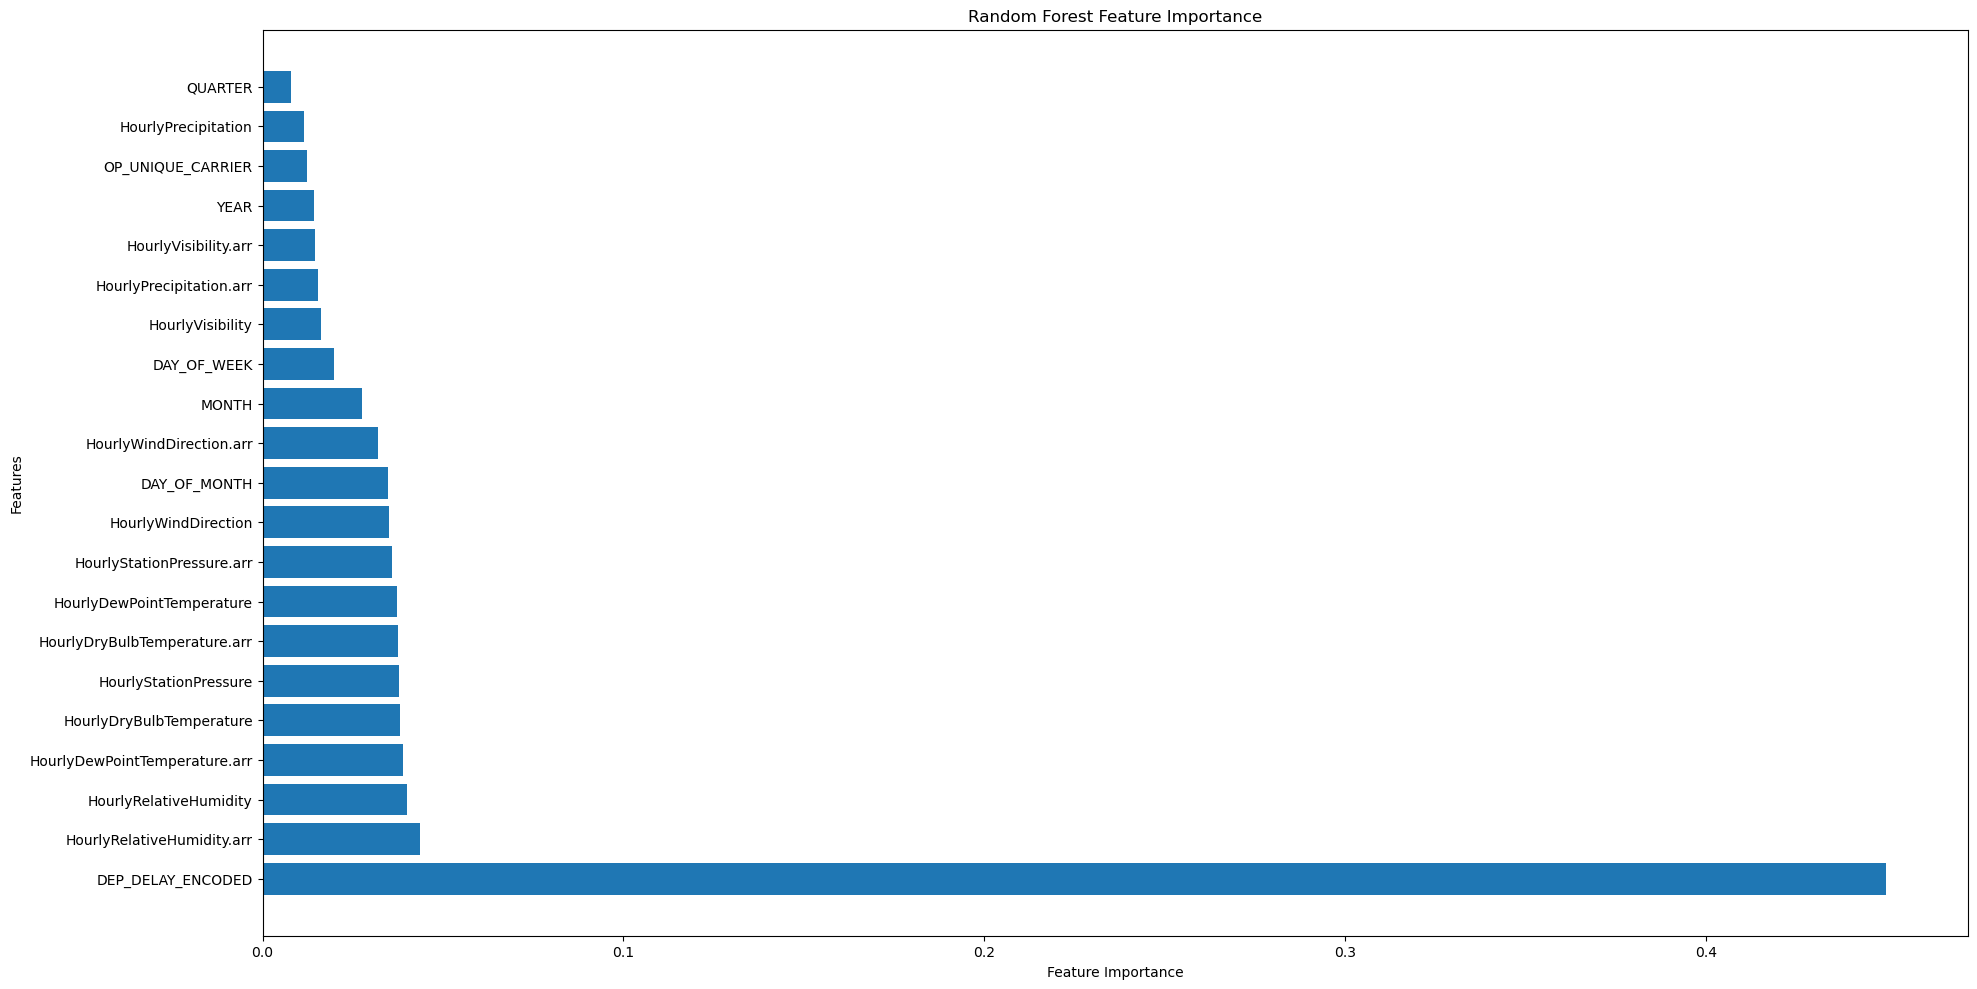

In [28]:
features = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Feature importance bar chart
plt.figure(figsize=(22, 12), dpi=100)
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.savefig('Random Forest Feature Importance.jpg')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss, f1_score, mean_absolute_error, mean_squared_error, roc_curve

# Initialize lists to store evaluation metrics
models = ['Random Forest']
accuracy = []
precision = []
recall = []
f1 = []
auc = []
mean_error = []
rms_error = []

# Calculate metrics for Random Forest
accuracy.append(grid_result.score(X_test, y_test))
precision.append(precision_score(y_test, y_pred_rf))
recall.append(recall_score(y_test, y_pred_rf))
f1.append(f1_score(y_test, y_pred_rf))
auc.append(roc_auc_score(y_test, y_pred_rf))
mean_error.append(mean_absolute_error(y_test, y_pred_rf))
rms_error.append(mean_squared_error(y_test, y_pred_rf, squared=False))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUROC': auc,
    'Mean Error': mean_error,
    'RMS Error': rms_error
})
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUROC,Mean Error,RMS Error
0,Random Forest,0.87,0.69,0.62,0.66,0.78,0.13,0.36


LSTM model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train and y_train are already prepared with the correct shapes
num_features = 21

# Reshape X_train to have the correct 3D shape
X_train_reshaped = X_train.values.reshape(-1, 1, num_features)

# Define a function to create the LSTM model
def create_lstm_model(num_units=64, dropout_rate=0.0):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=num_units, input_shape=(1, num_features)))
    lstm_model.add(Dropout(dropout_rate))
    lstm_model.add(Dense(units=1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    return lstm_model

# Wrap the Keras model for use with scikit-learn GridSearchCV
lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters to search
param_grid = {
    'num_units': [32, 64, 128],
    'dropout_rate': [0.0, 0.2, 0.4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=lstm_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the grid search to find the best parameters
grid_search_result = grid_search.fit(X_train_reshaped, y_train)

# Print the best parameters and best accuracy
print("Best Parameters: ", grid_search_result.best_params_)
print("Best Accuracy: ", grid_search_result.best_score_)

# Make predictions on the test set (assuming you have also reshaped X_test)
X_test_reshaped = X_test.values.reshape(-1, 1, 21)
y_pred_lstm = (grid_search_result.predict(X_test_reshaped) > 0.5).astype(int).reshape(-1)

# Evaluate the model
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_precision = precision_score(y_test, y_pred_lstm)
lstm_recall = recall_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm)
lstm_auc = roc_auc_score(y_test, y_pred_lstm)

34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 0s 2ms/step


34/34 [==============================] - 0s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 1ms/step


34/34 [==============================] - 1s 1ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 1ms/step


34/34 [==============================] - 1s 1ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 1s 2ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 947us/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 2ms/step


34/34 [==============================] - 0s 1ms/step


34/34 [==============================] - 0s 2ms/step


Best Parameters:  {'dropout_rate': 0.4, 'num_units': 64}
Best Accuracy:  0.8686806162341411
26/26 [==============================] - 0s 1ms/step


In [31]:
# Create a DataFrame to store the LSTM results
lstm_results_df = pd.DataFrame({
    'Model': ['LSTM'],
    'Accuracy': [lstm_accuracy],
    'Precision': [lstm_precision],
    'Recall': [lstm_recall],
    'F1 Score': [lstm_f1],
    'AUROC': [lstm_auc],
    'Mean Error': [mean_absolute_error(y_test, y_pred_lstm)],
    'RMS Error': [mean_squared_error(y_test, y_pred_lstm, squared=False)]
})

# Combine the results from all models into a single DataFrame
all_results_df = pd.concat([results_df, lstm_results_df])
all_results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUROC,Mean Error,RMS Error
0,Random Forest,0.87,0.69,0.62,0.66,0.78,0.13,0.36
0,LSTM,0.87,0.68,0.65,0.66,0.79,0.13,0.36


lightgbm model

In [32]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


# Define parameter grid for grid search
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'learning_rate': [0.1, 0.05],
    'num_leaves': [31, 63],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200, 300]
}

# Create train dataset
train_dataset = lgb.Dataset(X_train, label=y_train)

# Create LGBMClassifier
lgb_model = lgb.LGBMClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the model with best estimator
best_estimator.fit(X_train, y_train)

# Get feature importances
feature_importances = best_estimator.feature_importances_

# Make predictions
y_pred_lgb = best_estimator.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
lgb_precision = precision_score(y_test, y_pred_lgb)
lgb_recall = recall_score(y_test, y_pred_lgb)
lgb_f1 = f1_score(y_test, y_pred_lgb)
lgb_auc = roc_auc_score(y_test, y_pred_lgb)
lgb_mean_error = mean_absolute_error(y_test, y_pred_lgb)
lgb_rms_error = mean_squared_error(y_test, y_pred_lgb, squared=False)

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)
print("ROC AUC:", lgb_auc)
print("Mean Absolute Error:", lgb_mean_error)
print("Root Mean Squared Error:", lgb_rms_error)
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Best Parameters: {'boosting_type': 'dart', 'learning_rate': 0.05, 'max_depth': -1, 'metric': 'binary_logloss', 'n_estimators': 200, 'num_leaves': 31, 'objective': 'binary'}
Accuracy: 0.8780788177339901
Precision: 0.7012987012987013
Recall: 0.6708074534161491
F1 Score: 0.6857142857142858
ROC AUC: 0.8000734655713618
Mean Absolute Error: 0.12192118226600986
Root Mean Squared Error: 0.34917213844465006
Feature Importances:
HourlyWindDirection: 376
HourlyVisibility: 201
HourlyStationPressure: 510
HourlyPrecipitation.arr: 154
HourlyRelativeHumidity.arr: 493
HourlyDryBulbTemperature.arr: 449
HourlyDewPointTemperature.arr: 257
HourlyPrecipitation: 84
HourlyRelativeHumidity: 459
HourlyWindDirection.arr: 237
HourlyDryBulbTemperature: 461
HourlyDewPointTemperature: 273
DAY_OF_WEEK: 282
OP_UNIQUE_CARRIER: 93
HourlyVisibility.arr: 94
HourlyStationPressure.arr: 520
DAY_OF_MONTH: 379
MONTH: 267
QUARTER: 0
YEAR: 211
DEP_DELAY_ENCODED: 200


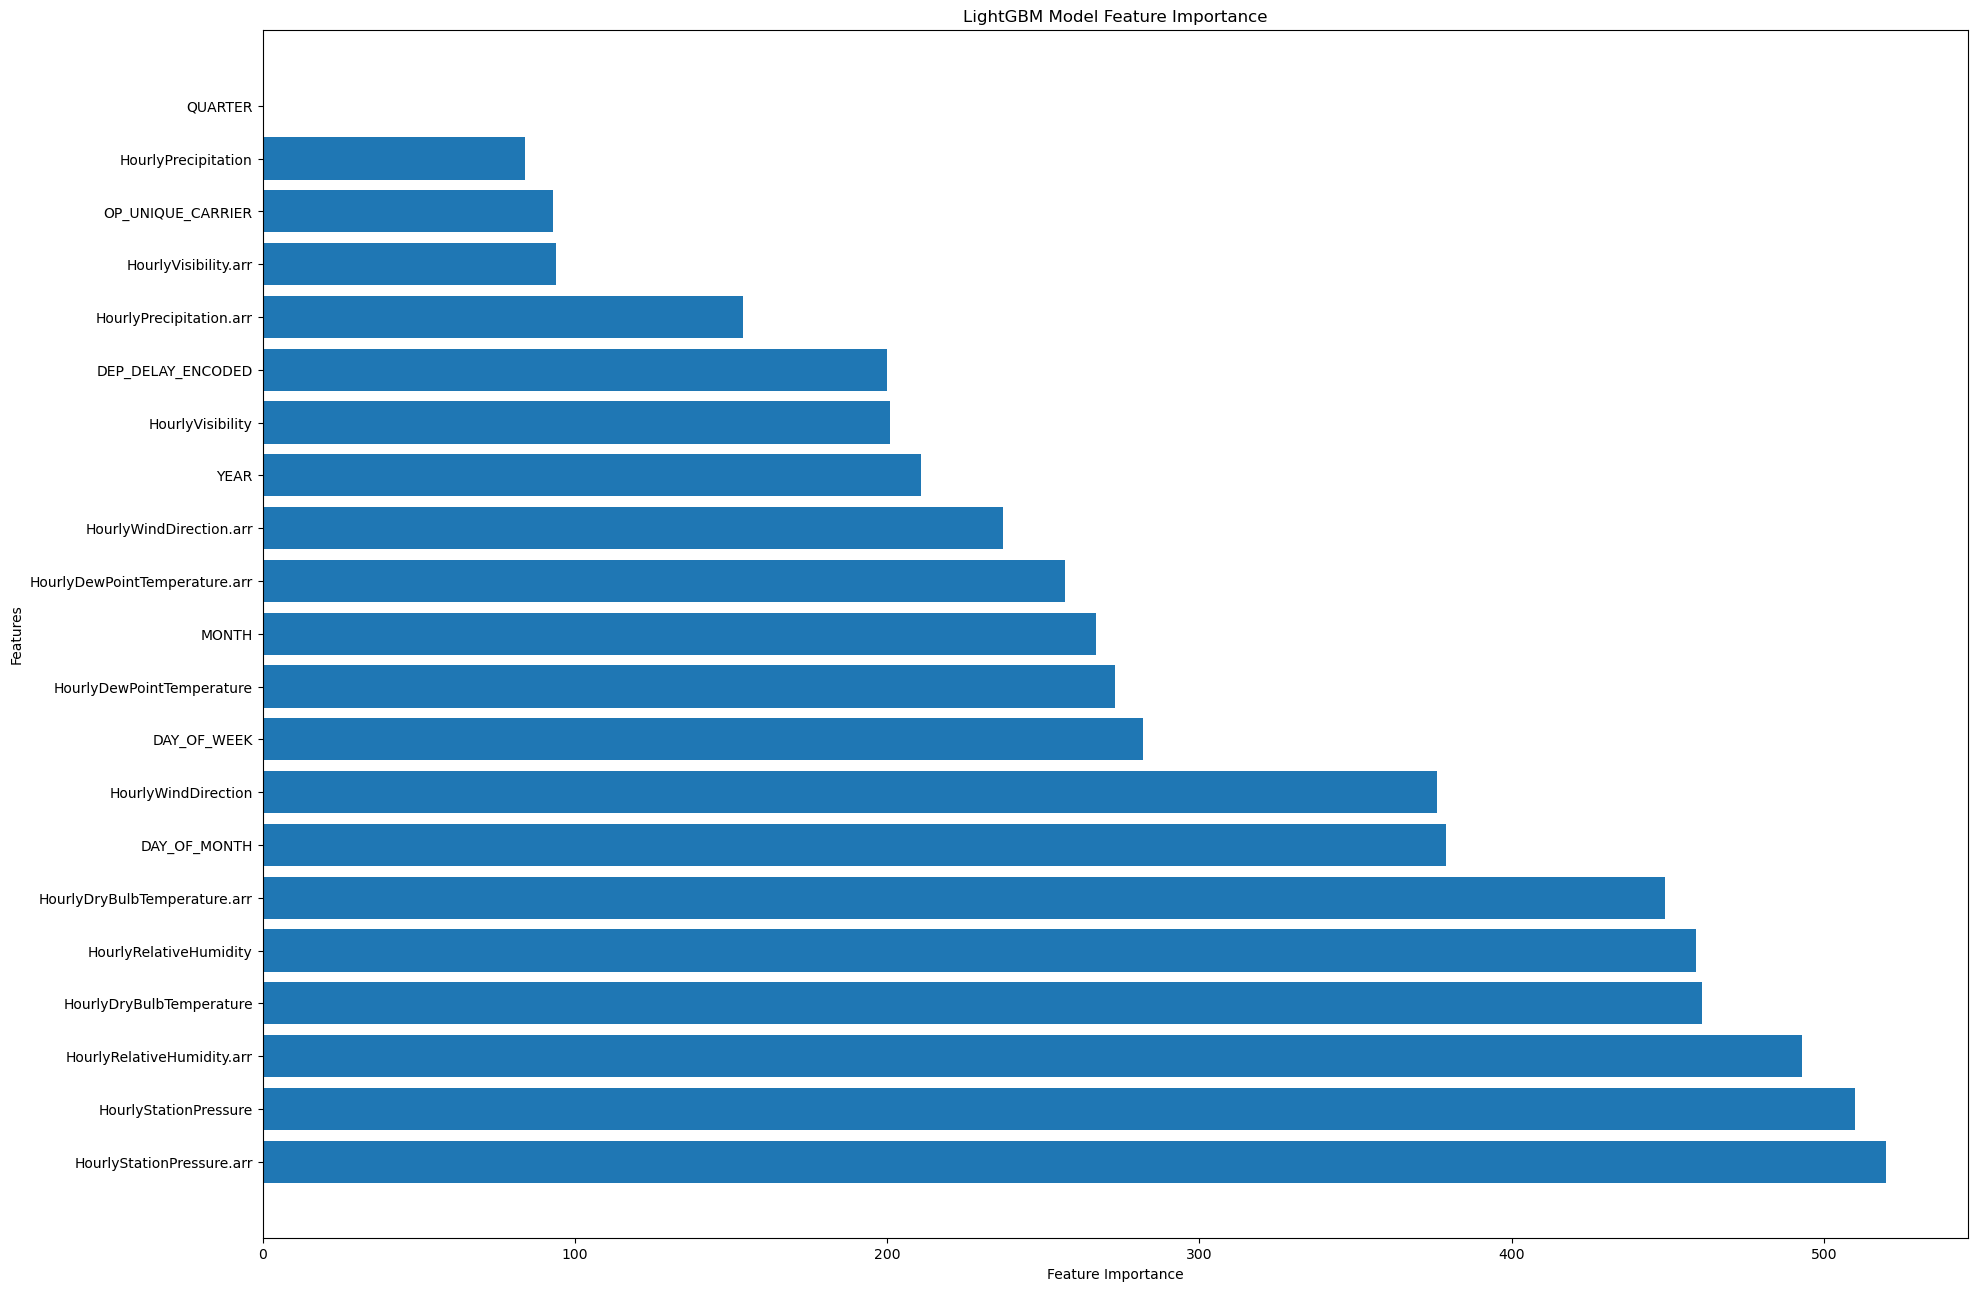

In [33]:
# Create a dictionary to map feature names to importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances for plotting
sorted_feature_names = [feature for feature, importance in sorted_features]
sorted_importances = [importance for feature, importance in sorted_features]

# lightgbm特征重要性图
plt.figure(figsize=(22, 16),dpi=100)
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LightGBM Model Feature Importance')
plt.savefig('LightGBM Model Feature Importance.jpg')
plt.show()

In [34]:
lgb_results_df = pd.DataFrame({
    'Model': ['LightGBM'],
    'Accuracy': [lgb_accuracy],
    'Precision': [lgb_precision],
    'Recall': [lgb_recall],
    'F1 Score': [lgb_f1],
    'AUROC': [lgb_auc],
    'Mean Error': [lgb_mean_error],
    'RMS Error': [lgb_rms_error]
})

all_results_df = pd.concat([all_results_df, lgb_results_df])
all_results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUROC,Mean Error,RMS Error
0,Random Forest,0.87,0.69,0.62,0.66,0.78,0.13,0.36
0,LSTM,0.87,0.68,0.65,0.66,0.79,0.13,0.36
0,LightGBM,0.88,0.70,0.67,0.69,0.80,0.12,0.35


Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each model
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
lstm_conf_matrix = confusion_matrix(y_test, y_pred_lstm)
lgb_conf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Create DataFrames to store the confusion matrices
rf_conf_df = pd.DataFrame(rf_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
lstm_conf_df = pd.DataFrame(lstm_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
lgb_conf_df = pd.DataFrame(lgb_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the confusion matrices
print("Random Forest Confusion Matrix:")
print(rf_conf_df)
print("\nLSTM Confusion Matrix:")
print(lstm_conf_df)
print("\nLightGBM Confusion Matrix:")
print(lgb_conf_df)


Random Forest Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          607           44
Actual 1           61          100

LSTM Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          603           48
Actual 1           57          104

LightGBM Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          605           46
Actual 1           53          108


In [36]:
# Calculate training accuracy for each model
rf_train_accuracy = accuracy_score(y_train, grid_result.predict(X_train))
lstm_train_accuracy = accuracy_score(y_train, (grid_search_result.predict(X_train_reshaped) > 0.5).astype(int).reshape(-1))
lgb_train_accuracy = accuracy_score(y_train, best_estimator.predict(X_train))

# Calculate testing accuracy for each model
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
lstm_test_accuracy = accuracy_score(y_test, y_pred_lstm)
lgb_test_accuracy = accuracy_score(y_test, y_pred_lgb)


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'LSTM', 'LightGBM'],
    'Training Accuracy': [rf_train_accuracy, lstm_train_accuracy, lgb_train_accuracy],
    'Testing Accuracy': [rf_test_accuracy, lstm_test_accuracy, lgb_test_accuracy]
})

print(results)

102/102 [==============================] - 0s 2ms/step
           Model  Training Accuracy  Testing Accuracy
0  Random Forest               0.94              0.87
1           LSTM               0.88              0.87
2       LightGBM               0.92              0.88


26/26 [==============================] - 0s 2ms/step


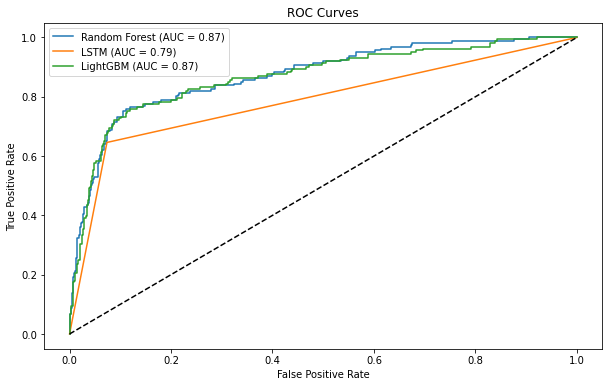

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities on the test set for each model
rf_probs = grid_result.predict_proba(X_test)[:, 1]
lstm_probs = grid_search_result.predict(X_test_reshaped)
lgb_probs = best_estimator.predict_proba(X_test)[:, 1]

# Compute ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_probs)
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)

# Compute AUC scores
rf_auc = roc_auc_score(y_test, rf_probs)
lstm_auc = roc_auc_score(y_test, lstm_probs)
lgb_auc = roc_auc_score(y_test, lgb_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(lstm_fpr, lstm_tpr, label=f"LSTM (AUC = {lstm_auc:.2f})")
plt.plot(lgb_fpr, lgb_tpr, label=f"LightGBM (AUC = {lgb_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.savefig('ROC Curves.jpg')
plt.show()


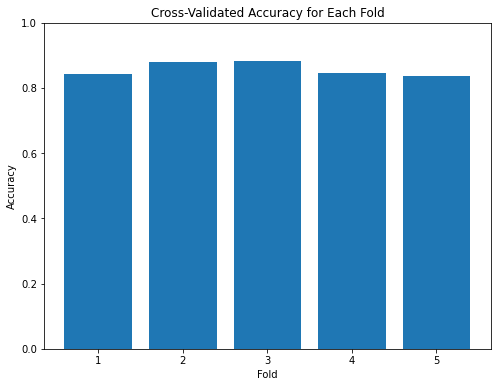

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 创建一个随机森林分类器
rf_model = RandomForestClassifier()


X_train = np.array(X_train)
y_train = np.array(y_train)


# 创建五折交叉验证对象
kf = KFold(n_splits=5)

fold_accuracies = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # 训练模型
    rf_model.fit(X_train_fold, y_train_fold)
    
    # 在测试集上预测
    y_pred_fold = rf_model.predict(X_test_fold)
    
    # 计算准确率并存储
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# 绘制准确率图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 6), fold_accuracies, tick_label=np.arange(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validated Accuracy for Each Fold')
plt.ylim(0, 1)  # 设置y轴范围为0到1
plt.savefig('Cross-Validated Accuracy for Each Fold.jpg')
plt.show()